# **Program 7**

Prepare a decision tree model for Iris Dataset using Gini Index.

Best feature: PetalLengthCm


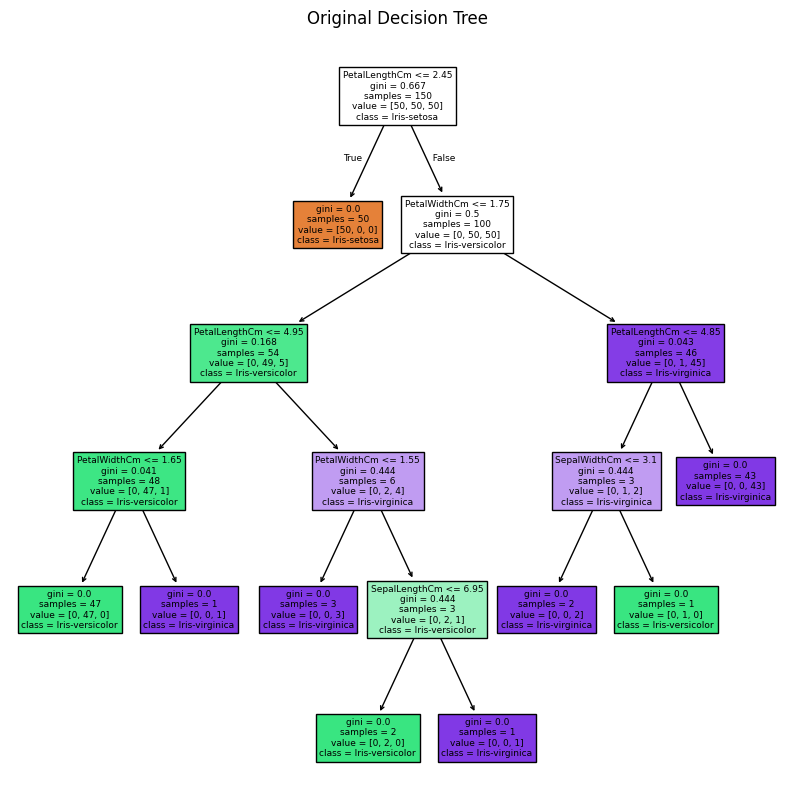

In [14]:
# Import necessary libraries
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset
df = pd.read_csv("Iris.csv")

# Define feature matrix 'x' by dropping 'Species' and 'Id' columns and target variable 'y' as 'Species'
x = df.drop(['Species', 'Id'], axis=1)
y = df['Species']

# Initialize DecisionTreeClassifier with Gini impurity criterion
model = DecisionTreeClassifier(criterion='gini')

# Dictionary to store Gini impurity for each feature
gini_impurities = {}

#loop through each feature
for i in range(x.shape[1]):
    #fit classifier with only the current feature
    model.fit(x.iloc[:, i].values.reshape(-1, 1), y)
    prob=model.predict_proba(x.iloc[:, i].values.reshape(-1,1))
    gini_impurities[i] = 1 - (prob[:, 0]**2 + prob[:, 1]**2 + prob[:, 2]**2).sum()

# Find the feature with the lowest Gini impurity (best feature)
best_feature = min(gini_impurities, key=gini_impurities.get)
print(f"Best feature: {x.columns[best_feature]}")

model.fit(x, y)

#plot original tree
plt.figure(figsize=(10, 10))
plot_tree(model, filled=True, feature_names=x.columns, class_names=model.classes_)
plt.title("Original Decision Tree")
plt.show()